In [1]:
import numpy as np 
import pandas as pd 
import datetime
from datetime import datetime
from datetime import datetime, timedelta
from tqdm import tqdm_notebook as tqdm
import calendar
import math
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm


from multiprocessing import Pool, TimeoutError, Lock, Value, current_process, cpu_count
from functools import partial
import Cluster_function as func

In [3]:
data = pd.read_csv('D:\\庫存健診開發\\data\\Stock\\TWSE_Stock.csv', converters={'ts': str, 'StockName': str, 'StockNo': str})
data['ts'] = pd.to_datetime(data['ts'])
data

,StockName,StockNo,close,high,low,open,return,total,ts,vol
0,台泥,1101,19.30,19.90,19.10,19.90,NaN,8.756613e+08,2004-02-11,44990547.0
1,台泥,1101,18.70,19.60,18.40,19.40,-0.60,7.295642e+08,2004-02-12,38283630.0
2,台泥,1101,20.00,20.00,18.90,19.00,1.30,1.200960e+09,2004-02-13,60809947.0
3,台泥,1101,21.00,21.40,20.00,20.00,1.00,3.204683e+09,2004-02-16,154068407.0
4,台泥,1101,21.00,21.30,20.40,21.00,0.00,1.477319e+09,2004-02-17,70709589.0
...,...,...,...,...,...,...,...,...,...,...
3266206,慶豐富,9935,34.50,34.80,33.50,33.85,0.75,6.743481e+07,2019-09-17,1962367.0
3266207,慶豐富,9935,34.65,35.20,34.00,34.50,0.15,1.134111e+08,2019-09-18,3261600.0
3266208,慶豐富,9935,34.95,35.20,34.70,34.80,0.30,5.601946e+07,2019-09-19,1604885.0
3266209,慶豐富,9935,34.15,35.45,34.15,35.05,-0.80,7.139641e+07,2019-09-20,2046476.0


In [3]:
Start = datetime.strptime('2016-09-01', '%Y-%m-%d').date()
End = datetime.strptime('2017-09-01', '%Y-%m-%d').date()
Corr_matrix = func.CorrMatrix(data, Start, End)
Corr_matrix

,台泥,亞泥,嘉泥,環泥,幸福,信大,東泥,味全,味王,大成,...,宏全,信義,裕融,茂順,好樂迪,新麗,潤泰新,三發地產,佳龍,世紀鋼
台泥,1.000000,0.513242,0.229716,0.158563,0.120876,0.159660,0.048856,0.129007,0.084946,0.223713,...,0.118435,0.327425,-0.034423,0.071558,0.183727,0.032595,0.215132,0.102929,0.041299,-0.007246
亞泥,0.513242,1.000000,0.036670,0.273091,0.170345,0.244495,0.084275,0.018277,0.104123,0.151626,...,0.075061,0.236708,0.009203,0.039440,0.104059,0.044102,0.137351,0.135605,0.112307,-0.027490
嘉泥,0.229716,0.036670,1.000000,-0.017541,0.250580,0.087312,0.004179,0.248062,0.060386,0.062316,...,0.155842,0.194792,-0.001194,0.058372,0.120273,-0.024991,0.178648,0.213514,-0.118688,0.150580
環泥,0.158563,0.273091,-0.017541,1.000000,0.234891,0.044259,0.304494,0.032330,0.112289,0.100302,...,0.163302,0.071320,-0.007943,0.035384,0.015529,0.063563,0.139358,-0.013860,0.051696,-0.086675
幸福,0.120876,0.170345,0.250580,0.234891,1.000000,0.223013,-0.003156,0.177493,0.024810,0.136655,...,0.142376,0.115933,0.052577,0.070354,0.098595,0.188154,0.202809,0.179812,0.034040,0.161854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
新麗,0.032595,0.044102,-0.024991,0.063563,0.188154,-0.025751,-0.247456,-0.059377,-0.018832,0.101842,...,0.145703,0.040680,0.030151,0.080730,-0.016632,1.000000,-0.018206,0.029399,0.122512,-0.010844
潤泰新,0.215132,0.137351,0.178648,0.139358,0.202809,0.136906,0.023899,0.086500,0.111063,0.234628,...,0.075203,0.268657,0.069830,0.143220,0.025320,-0.018206,1.000000,0.206921,0.005833,0.204743
三發地產,0.102929,0.135605,0.213514,-0.013860,0.179812,0.114083,0.010994,0.191399,0.054637,0.050731,...,0.113498,0.138949,0.037827,0.126488,0.066053,0.029399,0.206921,1.000000,-0.042214,0.189470
佳龍,0.041299,0.112307,-0.118688,0.051696,0.034040,0.064984,-0.048013,0.020132,-0.077925,0.030298,...,-0.093523,0.006996,-0.011203,0.020896,0.000001,0.122512,0.005833,-0.042214,1.000000,0.057165


In [4]:
PCA_df, PCA_explained = func.DimensionReduction(Corr_matrix, component=0.9)
PCA_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71
台泥,-1.430990,1.732558,-0.300234,0.232327,0.648435,-0.329359,-0.249729,0.202410,0.123071,0.209949,...,0.317000,0.052962,-0.054263,-0.098287,-0.066371,0.004919,-0.072900,-0.052931,0.108511,-0.030482
亞泥,-1.460953,1.398527,0.013161,0.003298,-0.467448,-0.833611,-0.430779,0.498828,-0.071541,-0.102080,...,-0.086524,0.102224,0.095407,-0.035921,0.006039,0.093827,-0.171762,0.024595,0.171700,0.171579
嘉泥,0.356396,0.960428,-1.215560,-0.538571,0.773032,1.041656,0.331141,-0.786269,-0.066922,-0.738118,...,0.030787,0.000226,0.027054,0.178509,0.003754,-0.046669,0.065161,0.230496,-0.144869,0.058572
環泥,-0.928204,0.056838,0.323056,-0.566078,-0.388018,-0.415567,0.182438,0.264685,0.794917,0.397565,...,0.026751,0.191496,-0.114610,0.139881,-0.068903,0.077806,-0.055009,0.163022,-0.035153,-0.168931
幸福,-1.311840,-0.271410,-0.784537,-0.439120,-0.469713,0.032085,0.613075,-0.021480,0.876404,-0.431894,...,-0.014775,0.139232,0.118525,-0.036120,-0.078107,-0.142661,-0.200543,0.053027,-0.016190,0.050292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
新麗,0.416470,-0.738588,-0.282785,1.195112,-0.285123,0.324629,0.998795,0.413253,0.774002,0.281089,...,-0.008538,-0.101265,0.076455,-0.027779,0.051265,0.038974,0.159494,-0.112116,0.003520,0.183691
潤泰新,-1.982488,0.124913,-0.195710,-0.279882,0.247480,0.604774,0.226558,0.024430,0.024165,-0.539993,...,0.206203,0.199534,-0.039287,-0.173163,0.038420,0.085059,-0.157108,0.187709,0.015293,0.079233
三發地產,-1.230672,0.463665,-0.280887,-0.603240,-1.180037,0.707638,0.532651,-0.509532,-0.537416,-0.211658,...,-0.011192,-0.161578,0.111924,0.136909,0.117264,0.052257,0.082630,-0.120320,-0.015651,0.146472
佳龍,0.732952,0.000497,0.246042,0.129418,-0.095337,-0.236970,-0.029960,-0.139106,-0.009480,0.716097,...,0.197577,-0.146104,0.150002,-0.055231,0.322940,0.017444,-0.094534,0.222500,-0.100675,0.051454


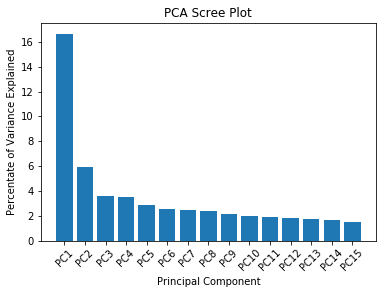

In [5]:
percent_variance = np.round(PCA_explained['explained']* 100, decimals =2)[:15]
columns = PCA_explained.index[:15].tolist()
plt.bar(x= range(1,16), height=percent_variance, tick_label=columns)
plt.xticks(rotation=45)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [8]:
clusters = [i for i in range(2, 31)]

In [30]:
Kmeans_Result, Kmeans_metrics = func.Cluster(Corr_matrix, method='Kmeans', cluster_list=clusters, weights=PCA_explained['explained'], weighting=False)
Kmedians_Result, Kmedians_metrics = func.Cluster(Corr_matrix, method='Kmedians', cluster_list=clusters, weights=PCA_explained['explained'], weighting=False)
Hierarchical_Result, Hierarchical_metrics = func.Cluster(Corr_matrix, method='Hierarchical', cluster_list=clusters, weights=PCA_explained['explained'], weighting=False)

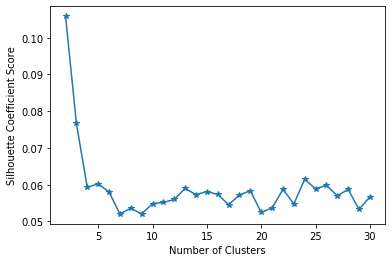

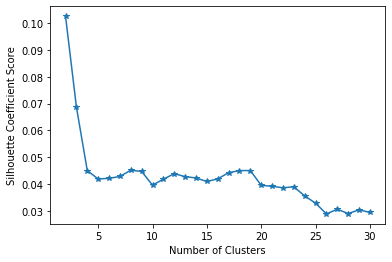

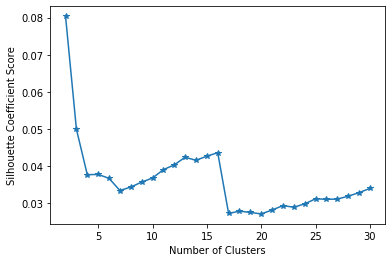

In [31]:
for method in [Kmeans_metrics, Kmedians_metrics, Hierarchical_metrics]:
    plt.figure()
    plt.plot(clusters, method, '*-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Coefficient Score')
    plt.show() 

In [44]:
df_list = []
for i, c in enumerate(tqdm(clusters, total=len(clusters))):
    d = func.ClusterCorrMatrix(Kmeans_Result, Corr_matrix, c)
    df_list.append(d)

In [45]:
count_2 = []
for d in df_list:
    i = 0
    for col in d.columns:
        if d[d[col] == d[col].max()].index == col:
            i += 1
        else:
            continue
    ratio = i/len(d)
    count_2.append(ratio)

In [46]:
count_2

[0.5,
 0.6666666666666666,
 0.5,
 0.6,
 0.6666666666666666,
 0.5714285714285714,
 0.625,
 0.5555555555555556,
 0.6,
 0.6363636363636364,
 0.5833333333333334,
 0.8461538461538461,
 0.7142857142857143,
 0.7333333333333333,
 0.8125,
 0.8235294117647058,
 0.7777777777777778,
 0.7368421052631579,
 1.0,
 0.8571428571428571,
 0.8181818181818182,
 0.782608695652174,
 0.7916666666666666,
 0.8,
 0.8846153846153846,
 0.8518518518518519,
 0.8571428571428571,
 0.9310344827586207,
 0.9]

In [50]:
df_list.append(count_2)

In [52]:
df_list[28]

,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10,...,Cluster_21,Cluster_22,Cluster_23,Cluster_24,Cluster_25,Cluster_26,Cluster_27,Cluster_28,Cluster_29,Cluster_30
Cluster_1,0.19433,0.0257121,0.0609652,0.0396607,0.117805,0.00847382,0.0884177,0.0285063,0.0652245,0.0526421,...,0.0955746,0.0854945,0.0556622,-0.0176775,0.0746292,0.0713079,0.0538294,0.0858036,0.0853439,0.097079
Cluster_2,0.0257121,0.107146,0.0269944,0.0252325,0.0790175,0.00422823,0.0702609,0.12569,0.0642874,0.0255233,...,0.0550336,0.0595396,0.0390689,0.0398318,0.0491213,0.0747351,0.044175,0.0421212,0.0170283,0.0608299
Cluster_3,0.0609652,0.0269944,0.120686,0.0191653,0.0872919,0.010642,0.0639596,0.0508207,0.0657451,0.0507645,...,0.0598602,0.0543663,0.0484233,0.0391991,0.0535306,0.0807419,0.0516078,0.0485651,0.0499237,0.0594657
Cluster_4,0.0396607,0.0252325,0.0191653,0.0574974,0.0673823,0.00445319,0.0479939,0.0299598,0.0383111,0.0206,...,0.0573024,0.0624618,0.0266857,0.029808,0.0365927,0.0515205,0.0405873,0.0444267,0.0358422,0.0573865
Cluster_5,0.117805,0.0790175,0.0872919,0.0673823,0.231025,0.0111018,0.137101,0.126465,0.141776,0.103978,...,0.141396,0.163954,0.115478,0.0827611,0.123585,0.148597,0.113655,0.11224,0.0875313,0.138315
Cluster_6,0.00847382,0.00422823,0.010642,0.00445319,0.0111018,0.00929243,0.00110231,-5.27542e-05,0.00590569,0.0110996,...,0.00825029,0.000213545,0.0065006,0.00323761,0.00881394,0.0110935,0.00172855,0.00413326,0.0109508,0.00381052
Cluster_7,0.0884177,0.0702609,0.0639596,0.0479939,0.137101,0.00110231,0.367888,0.163347,0.161556,0.0306433,...,0.10998,0.18882,0.0737821,0.0504602,0.142207,0.131959,0.0614862,0.0754066,0.0406295,0.149546
Cluster_8,0.0285063,0.12569,0.0508207,0.0299598,0.126465,-5.27542e-05,0.163347,0.339866,0.168686,0.0214673,...,0.0829131,0.151868,0.0935483,0.0400285,0.068265,0.13926,0.046338,0.0461783,0.0197645,0.0665421
Cluster_9,0.0652245,0.0642874,0.0657451,0.0383111,0.141776,0.00590569,0.161556,0.168686,0.233147,0.0563624,...,0.0944706,0.158758,0.111236,0.0619728,0.0813903,0.170424,0.0587601,0.0787339,0.0600652,0.0939069
Cluster_10,0.0526421,0.0255233,0.0507645,0.0206,0.103978,0.0110996,0.0306433,0.0214673,0.0563624,0.111604,...,0.0586523,0.0599746,0.0645699,0.0519933,0.0630775,0.02942,0.05214,0.0564078,0.0600556,0.0459143


In [49]:
Kmeans_Result.to_csv('D:\\庫存健診開發\\data\\Clustering\\Cluster_data_Kmeans.csv', index=True)
Kmedians_Result.to_csv('D:\\庫存健診開發\\data\\Clustering\\Cluster_data_Kmedians.csv', index=True)

In [9]:
import pickle
with open(f'D:\\庫存健診開發\\data\\Clustering\\Cluster_performance', 'rb') as fp:
    load_list = pickle.load(fp)

In [6]:
Cluster_df = pd.read_csv('D:\\庫存健診開發\\data\\Clustering\\Cluster_data_Kmeans.csv', index_col=0)
Cluster_df

,2,3,4,5,6,7,8,9,10,11,...,21,22,23,24,25,26,27,28,29,30
台泥,1,0,2,1,5,3,1,7,3,1,...,11,4,7,12,11,21,7,16,5,7
亞泥,1,0,2,1,5,3,1,7,3,1,...,11,4,7,12,11,21,7,16,5,7
嘉泥,0,2,3,0,0,5,2,1,6,2,...,5,5,1,17,19,23,15,26,3,2
環泥,1,0,2,0,3,2,6,3,2,3,...,12,19,2,13,21,18,19,18,18,15
幸福,1,1,1,0,1,4,6,8,7,4,...,7,0,9,8,4,11,0,11,25,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
新麗,0,1,3,3,4,4,0,0,4,7,...,7,14,19,17,14,25,14,17,21,9
潤泰新,1,0,2,4,3,6,3,3,3,4,...,6,20,15,9,2,16,9,15,14,19
三發地產,1,0,2,0,0,2,6,4,6,8,...,8,12,15,21,18,1,23,21,14,25
佳龍,0,2,3,3,4,5,2,2,0,10,...,2,11,16,10,3,9,18,4,0,3


In [7]:
Cluster_df.groupby(['13']).size()

13
0      50
1     153
2      73
3     147
4      68
5      73
6      44
7      52
8     116
9      44
10     43
11     60
12     15
dtype: int64

In [10]:
load_list[11]

,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10,Cluster_11,Cluster_12,Cluster_13
Cluster_1,0.237873,0.0125132,0.0693217,0.0564613,0.102213,0.0558611,0.118787,0.101908,0.10742,0.154016,0.071628,0.0665208,0.0923102
Cluster_2,0.0125132,0.00942827,0.0109995,0.00674159,0.015067,0.00462499,0.00556934,0.00461407,0.00655535,0.00794598,0.0112765,0.00718166,0.00729293
Cluster_3,0.0693217,0.0109995,0.14609,0.0453009,0.0680136,0.0538647,0.0834311,0.0575566,0.104308,0.119804,0.0679464,0.0667615,0.0844711
Cluster_4,0.0564613,0.00674159,0.0453009,0.0483275,0.0441438,0.0298728,0.0385631,0.0539987,0.0704883,0.0716593,0.047296,0.0494661,0.0472207
Cluster_5,0.102213,0.015067,0.0680136,0.0441438,0.135008,0.0556744,0.100184,0.078649,0.084624,0.120022,0.0554705,0.0553331,0.0904692
Cluster_6,0.0558611,0.00462499,0.0538647,0.0298728,0.0556744,0.0952486,0.0744541,0.0541214,0.0801378,0.0831008,0.0353923,0.0538864,0.075218
Cluster_7,0.118787,0.00556934,0.0834311,0.0385631,0.100184,0.0744541,0.278067,0.100643,0.0823025,0.182761,0.0167892,0.0521521,0.105574
Cluster_8,0.101908,0.00461407,0.0575566,0.0539987,0.078649,0.0541214,0.100643,0.209002,0.104932,0.151425,0.0619396,0.0578458,0.080266
Cluster_9,0.10742,0.00655535,0.104308,0.0704883,0.084624,0.0801378,0.0823025,0.104932,0.162549,0.15647,0.101493,0.103592,0.112971
Cluster_10,0.154016,0.00794598,0.119804,0.0716593,0.120022,0.0831008,0.182761,0.151425,0.15647,0.252289,0.0792351,0.0956332,0.141823
